In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion 

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

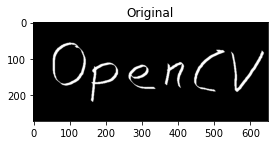

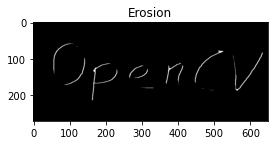

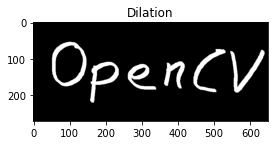

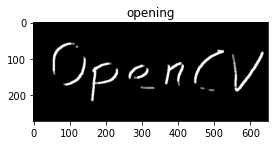

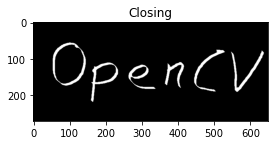

In [6]:
image = cv2.imread("images/opencv_inv.png", 0)
imshow("Original", image)

kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(image, kernel, iterations=1)
imshow("Erosion", erosion)

dilation = cv2.dilate(image, kernel, iterations = 1)
imshow("Dilation", dilation)

# Opening and closing - good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow("opening", opening)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow("Closing", closing)

## **Canny Edge Detection** 
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively. 
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. 

Edge detection needs a threshold to tell what difference/change should be counted as edge

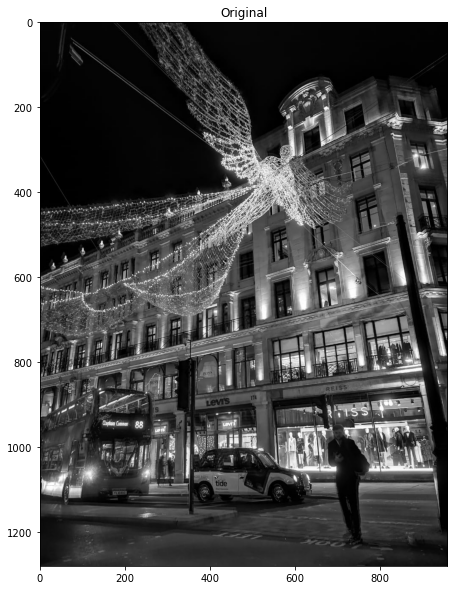

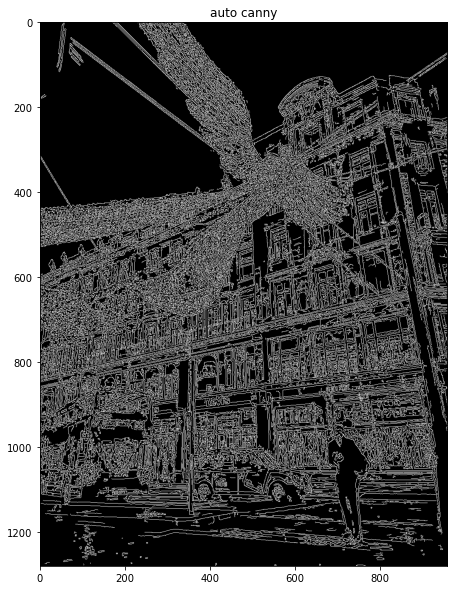

In [8]:
# Implementing auto - canny

image = cv2.imread("images/londonxmas.jpeg",0)
imshow("Original", image)
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)